# Ejemplo K-Means

Análisis de datos sobre usuarios de twitter y su personalidad

## 1. Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sns

%matplotlib inline

## 2. Carga de datos

In [2]:
df = pd.read_csv("social_media.csv")
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
df.categoria.value_counts()

2    34
1    27
4    19
7    17
8    16
3     9
6     8
9     6
5     4
Name: categoria, dtype: int64

## 3. EDA

In [4]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [5]:
df.describe(include="object")

,usuario
count,140
unique,140
top,3gerardpique
freq,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


Sobre las categorías disponibles nos encontramos los siguiente:
* 1. Actor
* 2. Cantante
* 3. Modelo
* 4. TV
* 5. Radio
* 6. Tecnología
* 7. Deportes
* 8. Política
* 9. Escritor

In [7]:
# Vemos el número de categorías (usuarios)

df.categoria.value_counts()

2    34
1    27
4    19
7    17
8    16
3     9
6     8
9     6
5     4
Name: categoria, dtype: int64

In [8]:
print("*CANTIDAD de datos nulos por columna en el dataframe")
print(df.isnull().sum())
print("----------------------------------")
print("*PORCENTAJE de datos nulos por columna en el dataframe")
print(df.isnull().sum()/len(df)*100)

*CANTIDAD de datos nulos por columna en el dataframe
usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
usuario      0.0
op           0.0
co           0.0
ex           0.0
ag           0.0
ne           0.0
wordcount    0.0
categoria    0.0
dtype: float64


C:\Users\pere_\AppData\Local\Temp\ipykernel_39708\4054472629.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['categoria'],1).hist()


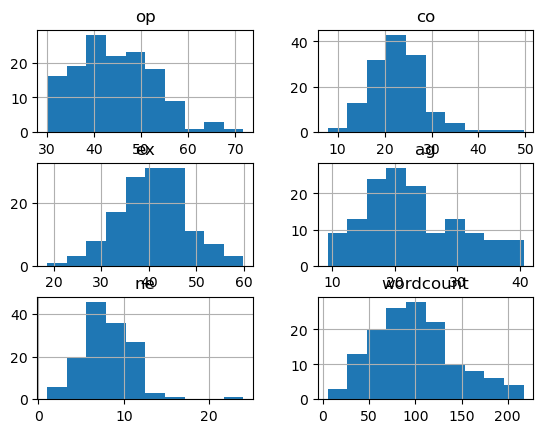

In [9]:
df.drop(['categoria'],1).hist()
plt.show()

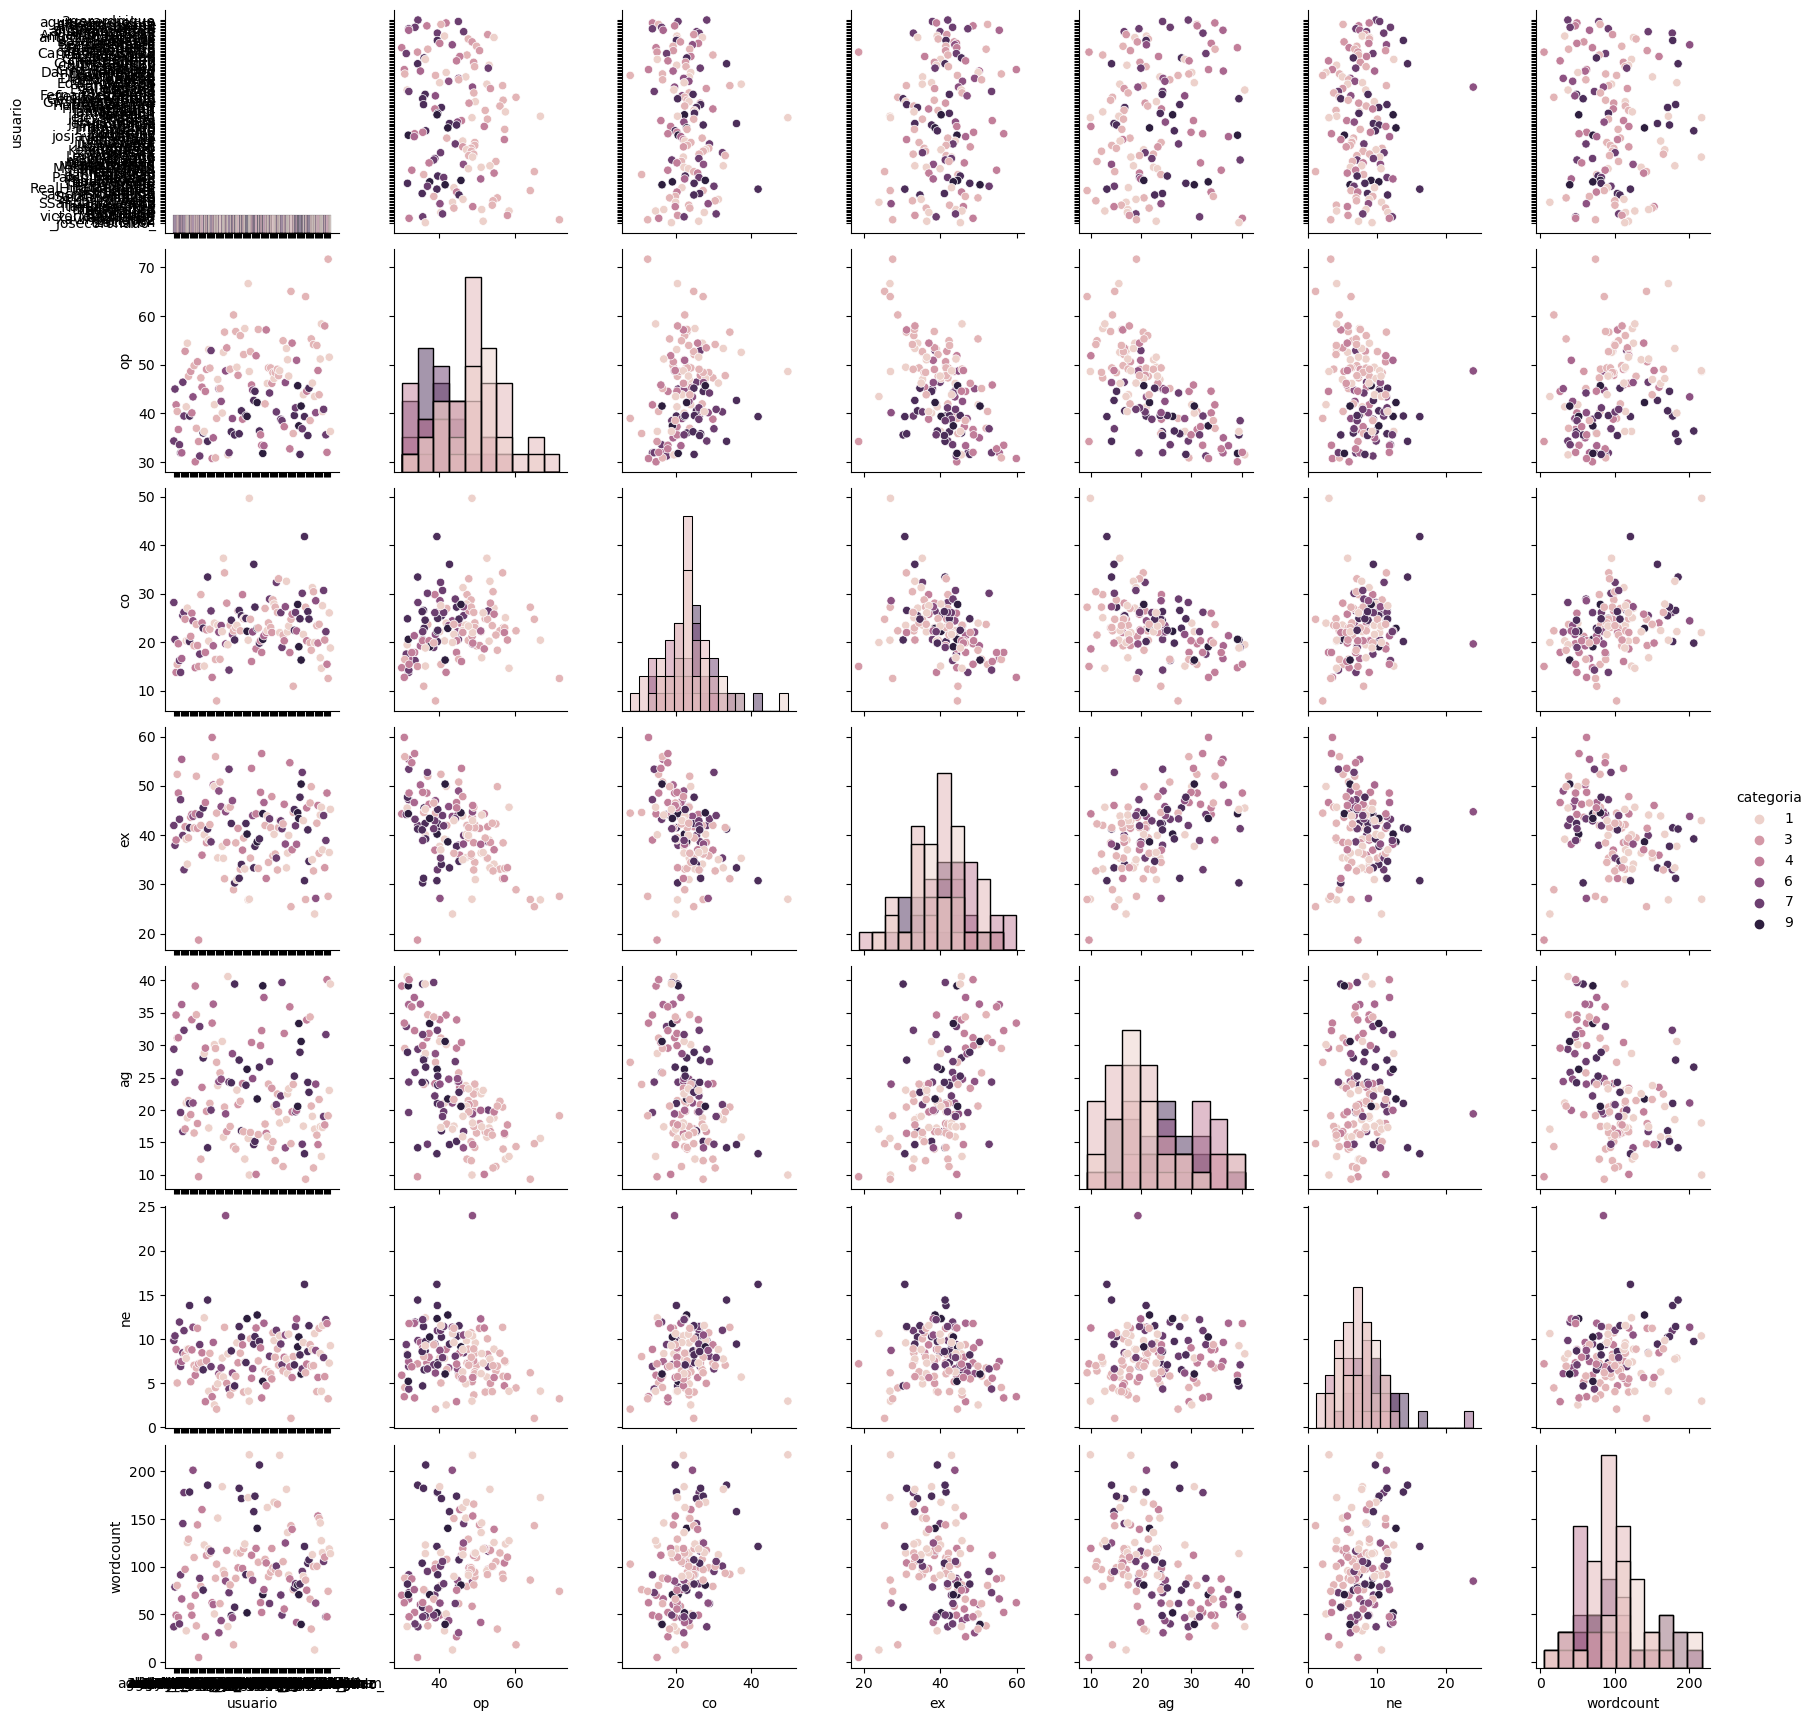

In [10]:
sns.pairplot(data=df, 
             hue="categoria", 
             vars=df.columns[df.columns != "categoria"], 
             diag_kind="hist")
plt.show()

C:\Users\pere_\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


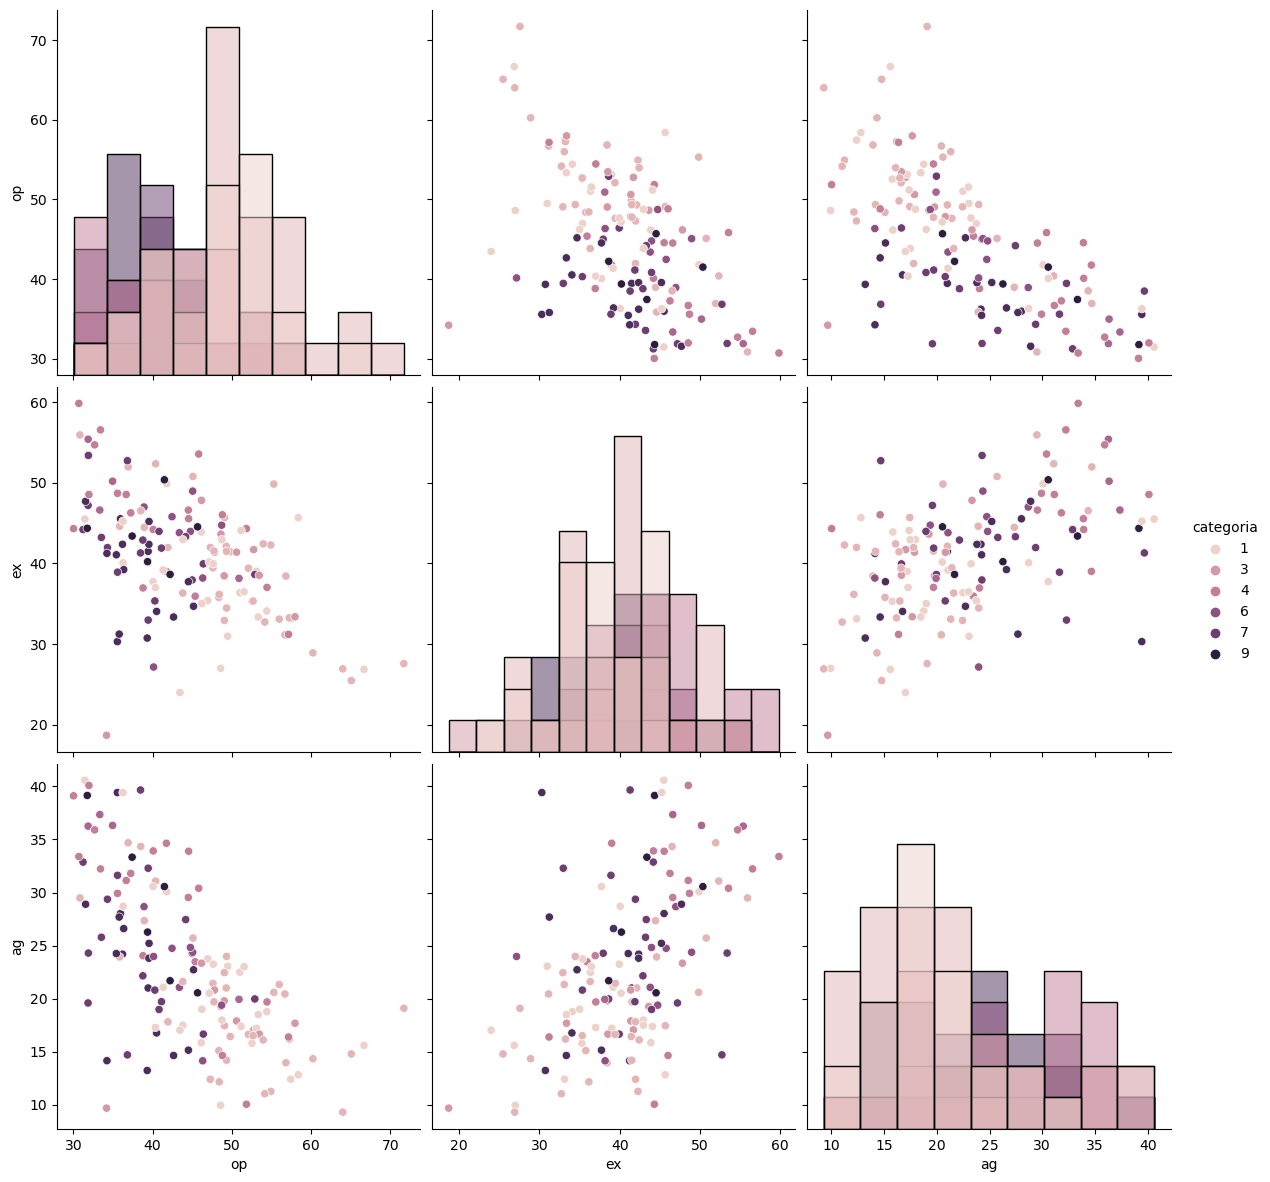

In [11]:
sns.pairplot(df, 
            hue='categoria',
            size=4,
            vars=["op","ex","ag"],
            kind='scatter', 
            diag_kind  = "hist")

## Variables de entrada a K-Means

In [12]:
X = np.array(df[["op","ex","ag",'ne', 'wordcount']])
y = np.array(df['categoria'])
X.shape

(140, 5)

Al clusterizar, trataremos de identificar si existen grandes diferencias entre las categorías de usuarios y, el número de clusters.

## Selección del parámetro K, método Elbow

In [13]:
# Calculo WSS (Within-Cluster-Sum of Squared Errors) en función del 
# número de clústers k
wss = []
for K in range(2, 15):
    clf = KMeans(init="random", random_state=0, n_clusters=K)
    resultados = cross_validate(clf, X, cv=4)
    wss.append(np.mean(resultados["test_score"]) * -1)

C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

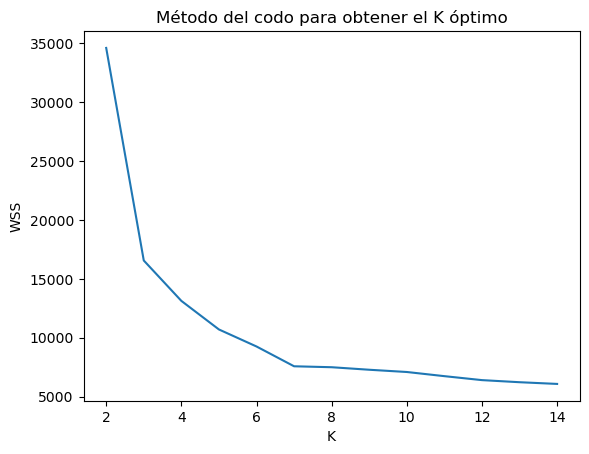

In [14]:
# Represento el método del codo
plt.plot(np.arange(2, 15), wss)
plt.xlabel("K")
plt.ylabel("WSS")
plt.title("Método del codo para obtener el K óptimo")
plt.show()

Parece que 6 clusters es un buen número

## Realización de K-Means con K-óptimo

In [15]:
# Ajusto el modelo con el mejor parámetro k=5
clf = KMeans(init="random", random_state=0, n_clusters=6)
clf.fit(X)
clusters = clf.predict(X)

C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pere_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
clusters

array([1, 0, 1, 3, 1, 1, 0, 3, 5, 2, 0, 1, 4, 4, 2, 1, 1, 2, 4, 3, 1, 5,
       1, 3, 0, 5, 3, 4, 1, 4, 2, 4, 4, 4, 3, 3, 1, 3, 4, 5, 1, 3, 1, 2,
       0, 0, 0, 4, 1, 3, 0, 1, 1, 1, 1, 0, 4, 0, 2, 4, 2, 0, 4, 4, 0, 1,
       2, 2, 0, 4, 0, 5, 2, 4, 5, 4, 2, 3, 1, 3, 3, 4, 4, 5, 0, 3, 0, 4,
       0, 5, 0, 0, 5, 0, 2, 3, 1, 4, 1, 4, 2, 5, 0, 3, 5, 5, 3, 3, 0, 1,
       0, 3, 3, 1, 0, 0, 4, 0, 3, 4, 4, 3, 1, 4, 0, 1, 3, 0, 5, 5, 5, 4,
       4, 4, 4, 1, 1, 0, 4, 4])

Mostramos los centroides

In [17]:
centroids = clf.cluster_centers_
print(centroids)

[[ 48.50177148  39.32310659  18.19220448   8.30733441  90.65608621]
 [ 40.37807804  42.48435025  28.04688125   7.67170668  41.09349643]
 [ 43.92321815  36.117941    20.56341908   9.63484454 188.24103077]
 [ 35.94067248  47.49157061  30.96036452   7.44837591  72.30481739]
 [ 48.51592594  39.01440238  19.64906625   7.79636372 114.69915   ]
 [ 48.7172156   37.78585207  19.16829033   7.8829292  150.66708667]]


In [18]:
cluster, conteo = np.unique(clusters, return_counts=True)

print(np.asarray((cluster, conteo)).T)

[[ 0 29]
 [ 1 28]
 [ 2 13]
 [ 3 23]
 [ 4 32]
 [ 5 15]]


## Obtención de métricas

In [19]:
df["asignacion_cluster"] = clusters

In [20]:
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,asignacion_cluster
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,1
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,0
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,1
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,3
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,1


In [21]:
df[(df["asignacion_cluster"]) == 1].describe()

,op,co,ex,ag,ne,wordcount,categoria,asignacion_cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,40.378078,20.451117,42.484350,28.046881,7.671707,41.093496,4.607143,1.0
std,6.888001,3.400237,8.501311,7.932196,2.849389,13.078429,2.514245,0.0
min,31.450855,13.745417,18.693542,9.682292,2.546667,5.020800,1.000000,1.0
25%,35.563305,18.192647,39.129974,23.411336,6.079567,36.504975,2.750000,1.0
50%,39.137485,20.338032,43.906340,29.452677,7.253088,45.057800,4.000000,1.0
75%,42.694434,22.290124,48.531386,32.653486,9.088128,49.308275,7.000000,1.0
max,60.225087,28.148819,56.539263,40.583162,12.314729,58.583300,9.000000,1.0


In [22]:
df[(df["asignacion_cluster"]) == 5].describe()

,op,co,ex,ag,ne,wordcount,categoria,asignacion_cluster
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,48.717216,24.002920,37.785852,19.168290,7.882929,150.667087,3.333333,5.0
std,5.651365,4.391143,5.192507,3.359470,2.991921,9.987893,2.690371,0.0
min,42.202857,16.749692,25.466170,14.642985,1.030213,135.757800,1.000000,5.0
25%,45.753561,22.236615,35.651044,16.250660,5.874991,143.390250,1.000000,5.0
50%,47.143474,23.656077,37.019847,19.690305,8.448409,150.546200,2.000000,5.0
75%,50.800434,25.596192,40.772735,22.068742,9.632718,158.701300,4.000000,5.0
max,65.067447,36.025197,46.014478,23.747561,12.730110,167.526300,9.000000,5.0


In [23]:
colores=['red','green','blue','cyan','yellow', "pink"]
asignar=[]
for row in clusters:
    asignar.append(colores[row])

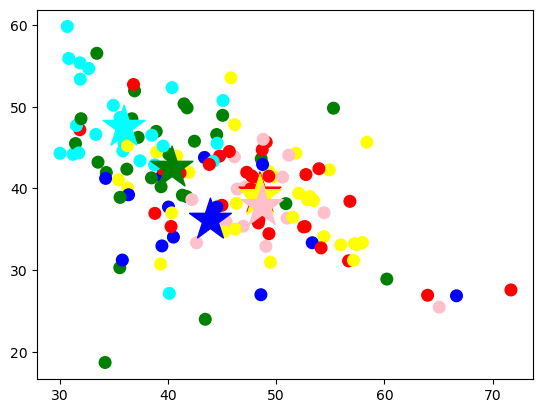

In [24]:
# Mostramos las dos primeras variables y sus asignaciones
f1 = df['op']
f2 = df['ex']

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(clf.cluster_centers_[:, 0], 
            clf.cluster_centers_[:, 1], 
            marker='*', c=colores, 
            s=1000)
plt.show()